
<h2 style="text-align:center;" class="centrado"> Prácticas FAA: Salvador Martín Barcia y Patricia Matos Meza </h2>
<h3 style="text-align:center;" class="centrado"> Práctica 2: Modelos, Scikit-learn, Análisis ROC </h3>


<p style="font-size: medium;"> A continuación, distribuiremos este cuaderno en los diferentes clasificadores que hemos implementado: Naive Bayes, Vecinos Próximos y Regresión Logística. Al final de cada una de ellas habrá un resumen de lo medido para que así sea más fácil ver los resultados. </p>

<p style="font-size: medium;"> Ahora, importaremos todas las librerías necesarias para la ejecución. </p>

In [1]:
from Datos import Datos
from ValidacionCruzada import ValidacionCruzada
from ValidacionSimple import ValidacionSimple
from ClasificadorNaiveBayes import ClasificadorNaiveBayes
from ClasificadorVecinosProximos import ClasificadorVecinosProximos
from ClasificadorRegresionLogistica import ClasificadorRegresionLogistica
from sklearn import preprocessing, naive_bayes, model_selection, linear_model, neighbors
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import dataframe_image as dfi
from IPython.display import display

# Ignoramos warnings porque al ejecutar scikit de regresión logística salta uno con epocas menores a 100
# Y para tener tiempos de ejecución medianamente pequeños al compararlo con nuestra implementación
import warnings; warnings.simplefilter('ignore')

In [2]:
# Instalamos el paquete dataframe_image que nos ayudará a plasmar los datos de manera más amigable
import sys
!conda install -c conda-forge --yes --prefix {sys.prefix} dataframe_image

Solving environment: done

# All requested packages already installed.



<h2> Obtención de los datos </h2>

<p style="font-size: medium"> Para esta primera parte de la práctica, cogeremos los datos de nuestra implementación de la clase Datos. A diferencia de la práctica 1, utilizaremos dos nuevos conjuntos de datos proporcionados.</p>

In [3]:
dataset = Datos('data/pima-indians-diabetes.data')
dataset2 = Datos('data/wdbc.data')

<h2> Naive-Bayes </h2>
<p style="font-size: medium"> Empezaremos con el clasificador Naive Bayes programado la práctica pasada. Ejecutaremos este clasificiador con las distintas estrategias de particionado también programadas en la práctica 1: Validación Simple y Validación Cruzada. No haremos hincapié en los comentarios de los resultados, puesto que este clasificador fue ya discutido en la práctica anterior.</p>
<h3> Validación Simple </h3>
<p style="font-size: medium">Ejecutaremos a continuación la estrategia de Validación Simple con las funciones de la práctica anterior. </p>

<h4> Indians </h4>

In [4]:
estrategia = ValidacionSimple(0.4, 1)
clasificador = ClasificadorNaiveBayes(False)
error_vs_sin_laplace_i_faa = clasificador.validacion(estrategia, dataset, clasificador)
print(error_vs_sin_laplace_i_faa[0])

0.30217391304347824


<h4> WDBC </h4>

In [5]:
estrategia = ValidacionSimple(0.4, 1)
clasificador = ClasificadorNaiveBayes(False)
error_vs_sin_laplace_w_faa = clasificador.validacion(estrategia, dataset2, clasificador)
print(error_vs_sin_laplace_w_faa[0])

0.07941176470588235


<h4> Resumen de lo medido </h4>

In [6]:
datos = [[error_vs_sin_laplace_i_faa[0], error_vs_sin_laplace_w_faa[0] ]]
resumen = pd.DataFrame(datos, index=['Errores'],columns=['Indians', 'WDBC'])
print(resumen)

          Indians      WDBC
Errores  0.302174  0.079412


<h3> Validación Cruzada </h3>
<p style="font-size: medium">Ejecutaremos a continuación la estrategia de Validación Cruzada con las funciones programas en esta práctica. </p>

<h4> Indians </h4>

In [7]:
estrategia = ValidacionCruzada(4)
clasificador = ClasificadorNaiveBayes(False)
error_vc_sin_laplace_i_faa = clasificador.validacion(estrategia, dataset, clasificador)

for i, error in enumerate(error_vc_sin_laplace_i_faa):
    print('Particion', i+1, ':', error)

Particion 1 : 0.265625
Particion 2 : 0.21875
Particion 3 : 0.2708333333333333
Particion 4 : 0.2916666666666667


<h4> WDBC </h4>

In [8]:
estrategia = ValidacionCruzada(4)
clasificador = ClasificadorNaiveBayes(False)
error_vc_sin_laplace_w_faa = clasificador.validacion(estrategia, dataset2, clasificador)

for i, error in enumerate(error_vc_sin_laplace_w_faa):
    print('Particion', i+1, ':', error)

Particion 1 : 0.07042253521126761
Particion 2 : 0.04929577464788732
Particion 3 : 0.08450704225352113
Particion 4 : 0.06993006993006994


<h4> Resumen de lo medido </h4>

In [9]:
datos = [error_vc_sin_laplace_i_faa, error_vc_sin_laplace_w_faa]
resumen = pd.DataFrame(datos, columns=['Particion 1', 'Particion 2', 'Particion 3',' Particion 4'],index=['Indians', 'WDBC'])
print(resumen)

         Particion 1  Particion 2  Particion 3   Particion 4
Indians     0.265625     0.218750     0.270833      0.291667
WDBC        0.070423     0.049296     0.084507      0.069930


<h2> Regresión Logística </h2>

<p style="font-size: medium">A continuación, mostraremos los valores que hemos seleccionado para probar el clasficador con valores distintos de épocas y constante de aprendizaje.</p>
<p style="font-size: medium">En el caso de las épocas hemos escogido números medianamente grandes para poder ver las diferencias con más claridad, y a su vez, que no aumentase demasiado el tiempo de ejecución. En cuanto a las constantes de aprendizaje, hemos seleccionado tanto valores grandes (10 y 1) como valores pequeños (0.1 y 0.01), de tal manera de evaluar el cambio de la frontera y su precisión respecto al mismo. Como sabemos, la frontera cambiará más bruscamente o más precisamente de acuerdo al valor de la constante. Evaluaremos también ventajas y desventajas que trae cada valor.</p>

In [10]:
epocas = [10, 20, 50]
cAprendizajes = [10, 1, 0.1, 0.01]

<h3> Validación Simple </h3>
<p style="font-size: medium">Ejecutaremos a continuación la estrategia de Validación Simple con las funciones programas en esta práctica. Obtendremos un resultado por constante de aprendizaje para cada una de las épocas.</p>

<h4> Indians </h4>

In [11]:
data_rl_vs_i = []
error_vs_sin_laplace_i_faa_rl = [] 
for epoca in epocas:
    for n in cAprendizajes:
        estrategia = ValidacionSimple(0.4, 1)
        clasificador = ClasificadorRegresionLogistica(epoca, n)
        error_vs_sin_laplace_i_faa_rl.extend(clasificador.validacion(estrategia, dataset, clasificador))
    data_rl_vs_i.append(error_vs_sin_laplace_i_faa_rl)
    error_vs_sin_laplace_i_faa_rl = []
print(data_rl_vs_i)

[[0.30869565217391304, 0.2782608695652174, 0.25, 0.23043478260869565], [0.35, 0.3652173913043478, 0.22391304347826088, 0.22608695652173913], [0.29347826086956524, 0.30869565217391304, 0.2891304347826087, 0.2565217391304348]]


<h4> WDBC </h4>

In [12]:
data_rl_vs_g = []
error_vs_sin_laplace_w_faa_rl = []
for epoca in epocas:
    for n in cAprendizajes:
        estrategia = ValidacionSimple(0.4, 1)
        clasificador = ClasificadorRegresionLogistica(epoca, n)
        error_vs_sin_laplace_w_faa_rl.extend(clasificador.validacion(estrategia, dataset2, clasificador))
    data_rl_vs_g.append(error_vs_sin_laplace_w_faa_rl)
    error_vs_sin_laplace_w_faa_rl = [] 
print(data_rl_vs_g)

[[0.03823529411764706, 0.029411764705882353, 0.029411764705882353, 0.03235294117647059], [0.05588235294117647, 0.04411764705882353, 0.04411764705882353, 0.026470588235294117], [0.06470588235294118, 0.047058823529411764, 0.026470588235294117, 0.026470588235294117]]


<h4> Resumen de lo medido </h4>

<p style="font-size: medium">A continuación, hemos utilizados Dataframes con gradientes para representar los resultados para cada uno de los conjuntos de datos, en donde, mientras más oscuros estén más elevados serán sus valores y mientras menos oscuros estén, pasará lo contrario.</p>

<h5> Indians </h5>

In [13]:
resumen = pd.DataFrame(data_rl_vs_i, columns=['n = 10', 'n = 1', 'n = 0.1',' n = 0.01'],index=['epoca = 10', 'epoca = 20', 'epoca = 50'])
resumen = resumen.style.background_gradient(cmap='Blues', low=.4, high=0.51, axis=1)
display(resumen)

,n = 10,n = 1,n = 0.1,n = 0.01
epoca = 10,0.308696,0.278261,0.250000,0.230435
epoca = 20,0.350000,0.365217,0.223913,0.226087
epoca = 50,0.293478,0.308696,0.289130,0.256522


<p style="font-size: medium"> Hemos obtenido como resultado valores bastante variados. Tenemos errores grandes, medios y pequeños. </p>
<p style="font-size: medium"> Para 10 y 20 épocas, vemos que los errores más grandes están para las constantes con valor 10, es decir la frontera se ajusta peor para la constante aprendizaje 10. El mejor caso sería, para ambas, el error para la constante de valor 0.01. Al ser un valor pequeños, quiere decir que la frontera va cambiando poco a poco, consiguiendo así un número mayor de coincidencias que los demás valores. Cabe destacar que, aunque el mejor valor sea ese, el resto también pueden ser consideranos como mejores, ya que el error es casi constante para estos números de épocas.</p>

<p style="font-size: medium"> Finalmente, para 50 épocas, el error más alto es en la constante de valor 1, siguiendole el error de n = 10, mientras que el clasificador tiene un número de errores bajos para n = 0.01 y n = 0.1.</p>

<p style="font-size: medium"> Podemos entonces concluir que para este conjunto de datos los valores para la constante de aprendizaje que más favorecen al modelo son los pequeños, es decir, en nuestro caso n = 0.1 y n = 0.01.</p>


<h5> WDBC </h5>

In [14]:
resumen = pd.DataFrame(data_rl_vs_g, columns=['n = 10', 'n = 1', 'n = 0.1',' n = 0.01'],index=['epoca = 10', 'epoca = 20', 'epoca = 50'])
resumen = resumen.style.background_gradient(cmap='Blues', low=.4, high=0.51, axis=1)
display(resumen)

,n = 10,n = 1,n = 0.1,n = 0.01
epoca = 10,0.038235,0.029412,0.029412,0.032353
epoca = 20,0.055882,0.044118,0.044118,0.026471
epoca = 50,0.064706,0.047059,0.026471,0.026471


<p style="font-size: medium"> En comparación con el conjunto de datos anterior, hemos obtenido errores mucho más pequeños. Esto podría significar que el modelo de regresión lineal junto a la estrategia de particionado, se ajustan mejor a este dataset que al anterior.</p>
<p style="font-size: medium"> Podemos observar que se mantiene más o menos el mismo comportamiento que en el conjunto de datos de Indians. Sin embargo, en este caso los mejores valores no se encuentran en las constantes de menor valor, sino en las de la mitad, que son n =  1 y n = 0.1. Entonces, este grupo de datos necesita un ajuste de la frontera ni demasiado preciso, ni demasiado brusco.</p>

<h3> Validación Cruzada </h3>
<p style="font-size: medium">Ejecutaremos a continuación la estrategia de Validación Cruzada cambiando los valores de las épocas y de las constantes al igual que en Validación Simple. Por cada constante de aprendizaje, guardaremos la media de los errores de las particiones para simplificar la representación de los mismos. Los valores elegidos para las épocas y para las constantes de aprendizaje serán los mismos que para el apartado anterior.</p>

<h4> Indians </h4>

In [15]:
data_rl_vc_i = []
error_vc_sin_laplace_i_faa_rl = []
for epoca in epocas:
    for n in cAprendizajes:
        estrategia = ValidacionCruzada(4)
        clasificador = ClasificadorRegresionLogistica(epoca, n)
        error_vc_sin_laplace_i_faa_rl.append(np.mean(clasificador.validacion(estrategia, dataset, clasificador)))
    data_rl_vc_i.append(error_vc_sin_laplace_i_faa_rl)
    error_vc_sin_laplace_i_faa_rl = []
print(data_rl_vc_i)  

[[0.30338541666666663, 0.2786458333333333, 0.25390625, 0.22265625], [0.3684895833333333, 0.25520833333333337, 0.24088541666666666, 0.23177083333333334], [0.3046875, 0.3828125, 0.2513020833333333, 0.22526041666666666]]


<h4> WDBC </h4>

In [16]:
data_rl_vc_w = []
error_vc_sin_laplace_w_faa_rl = []
for epoca in epocas:
    for n in cAprendizajes:
        estrategia = ValidacionCruzada(4)
        clasificador = ClasificadorRegresionLogistica(epoca, n)
        error_vc_sin_laplace_w_faa_rl.append(np.mean(clasificador.validacion(estrategia, dataset2, clasificador)))
    data_rl_vc_w.append(error_vc_sin_laplace_w_faa_rl)
    error_vc_sin_laplace_w_faa_rl = []
print(data_rl_vc_w)  

[[0.033401457697232344, 0.045676154831084406, 0.02808283266029745, 0.02985570767260908], [0.033401457697232344, 0.04568846646311435, 0.03867083620604748, 0.0475228996355757], [0.04570077809514429, 0.04919728159164778, 0.038658524574017535, 0.029880330936668965]]


<h4> Resumen de lo medido </h4>
<p style="font-size: medium">A continuación, los datos agrupados en dataframes.</p>

<h5> Indians </h5>

In [17]:
resumen = pd.DataFrame(data_rl_vc_i, columns=['n = 10', 'n = 1', 'n = 0.1',' n = 0.01'],index=['epoca = 10', 'epoca = 20', 'epoca = 50'])
resumen = resumen.style.background_gradient(cmap='Blues', low=.4, high=0.51, axis=1)
display(resumen)

,n = 10,n = 1,n = 0.1,n = 0.01
epoca = 10,0.303385,0.278646,0.253906,0.222656
epoca = 20,0.368490,0.255208,0.240885,0.231771
epoca = 50,0.304688,0.382812,0.251302,0.225260


<p style="font-size: medium"> El comportamiento de los errores es similar al comportamiento del mismo dataset pero en validación simple. Los errores más altos se correspondes con los valores más altos de constante, y los mínimos se corresponden a los valores mínimos de n. </p>

<p style="font-size: medium"> Por otro lado, como esperábamos, los errores máximos son más pequeños que los errores máximos de Validación Simple, ya que Validación Cruzada hace una separación de los datos más exhaustiva que permite que la evaluación sea más certera que en la estrategia de particionado anterior. </p>

<h5> WDBC </h5>

In [18]:
resumen = pd.DataFrame(data_rl_vc_w, columns=['n = 10', 'n = 1', 'n = 0.1',' n = 0.01'],index=['epoca = 10', 'epoca = 20', 'epoca = 50'])
resumen = resumen.style.background_gradient(cmap='Blues', low=.4, high=0.51, axis=1)
display(resumen)

,n = 10,n = 1,n = 0.1,n = 0.01
epoca = 10,0.033401,0.045676,0.028083,0.029856
epoca = 20,0.033401,0.045688,0.038671,0.047523
epoca = 50,0.045701,0.049197,0.038659,0.029880


<p style="font-size: medium"> El comportamiento de los errores cambia un poco en comparación al de validación simple. La magnitud de los errores está dispersa por los distintos valores, es decir, no hay un patrón claro. </p>

<p style="font-size: medium"> La mayor concentración de errores grandes está para las constantes de valor elevado. Sin embargo, para las épocas de 20 y de 50, el error más pequeño se da para n = 0.01, en donde este es casi nulo. Mientras que, para la época de 10, este valor casi nulo se da para n = 0.1. </p>

<h2> Vecinos próximos </h2>

<p style="font-size: medium">A continuación, mostraremos los valores que hemos seleccionado para probar el clasficador con valores distintos número de vecinos, algoritmo de distancia y normalización</p>
<p style="font-size: medium">Como tenemos que hacerlo para 3 distancias, mínimo 2 k, con normalización y sin ella, con las distintas estrategias de particionado y para ambas bases de datos deberíamos ejecutar la práctica mínimo 48 veces. Como esto nos llevaría demasiado tiempo, ejecutaremos solo algunos de los casos, reduciendo asi en gran medida el tiempo de ejecución.

In [19]:
ksKnn = [1 ,3, 5]
distanciasKnn = ["euclidea", "manhattan", "mahalanobis"]
normalizacionKnn = [True, False]

<h3> Validación Simple </h3>
<p style="font-size: medium">Ejecutaremos a continuación la estrategia de Validación Simple para ambas k, con la distancia euclidea, con normalización y sin ella
</p>

<h4> Indians </h4>

In [20]:
data_knn_vs_i = []
error_vs_i_knn = [] 
for n in normalizacionKnn:
    for k in ksKnn:
        estrategia = ValidacionSimple(0.7, 1)
        clasificador = ClasificadorVecinosProximos(k=k, normalizacion=n)
        error_vs_i_knn.extend(clasificador.validacion(estrategia, dataset, clasificador))
    data_knn_vs_i.append(error_vs_i_knn)
    error_vs_i_knn = [] 
print(data_knn_vs_i)

[[0.29694323144104806, 0.25327510917030566, 0.2314410480349345], [0.35807860262008734, 0.31004366812227074, 0.2576419213973799]]


<h4> WDBC </h4>

In [21]:
data_knn_vs_wdbc = []
error_vs_wdbc_knn = [] 
for n in normalizacionKnn:
    for k in ksKnn:
        estrategia = ValidacionSimple(0.7, 1)
        clasificador = ClasificadorVecinosProximos(k=k, normalizacion=n)
        error_vs_wdbc_knn.extend(clasificador.validacion(estrategia, dataset2, clasificador))
    data_knn_vs_wdbc.append(error_vs_wdbc_knn)
    error_vs_wdbc_knn = [] 
print(data_knn_vs_wdbc)

[[0.03529411764705882, 0.041176470588235294, 0.023529411764705882], [0.08823529411764706, 0.07647058823529412, 0.08235294117647059]]


<h4> Resumen de lo medido </h4>

<p style="font-size: medium">A continuación, los datos agrupados en Dataframes. Cabe destacar, que hemos hecho pruebas con datos normalizados y no normalizados, con diferentes valores para k, pero solo para la distancia euclídea, puesto que si ejecutabamos las tres distancias el tiempo de ejecución sería muy alto.</p>

<h5> Indians distancia euclidea</h5>

In [22]:
resumen = pd.DataFrame(data_knn_vs_i, columns=['k = 1','k = 3', 'k = 5'],index=['Normalizado', 'No normalizado'])
resumen = resumen.style.background_gradient(cmap='Blues', low=.4, high=0.51, axis=1)
display(resumen)

,k = 1,k = 3,k = 5
Normalizado,0.296943,0.253275,0.231441
No normalizado,0.358079,0.310044,0.257642


<p style="font-size: medium">Como primera observación tenemos que los valores son parecidos entre sí, independientemente de si los datos estén normalizados o no. En cuanto a las diferencias de acuerdo al tamaño de vecindario escogido, tenemos que el modelo es ligeramente más efectivo para k = 3. Es un poco peor para k = 1, lo cual tiene sentido ya que al ser un valor de k bajo, podría haber ruído en los resultados. Sin embargo, todos los valores son bastante buenos y casi no hay diferencia. </p>

<h5> WDBC distancia euclidea</h5>

In [23]:
resumen = pd.DataFrame(data_knn_vs_wdbc, columns=['k = 1','k = 3', 'k = 5'],index=['Normalizado', 'No normalizado'])
resumen = resumen.style.background_gradient(cmap='Blues', low=.4, high=0.51, axis=1)
display(resumen)

,k = 1,k = 3,k = 5
Normalizado,0.035294,0.041176,0.023529
No normalizado,0.088235,0.076471,0.082353


<p style="font-size: medium"> Para este dataset podemos ver claramente como si hay una diferencia considerable entre los errores de los datos normalizados y los no normalizados. El modelo falla menos con datos normalizados para cada uno de los valores de k escogidos. </p>

<p style="font-size: medium"> Dentro de los datos normalizados, vemos como nuevamente el resultado óptimo, y con diferencia, lo tenemos para k = 3, siendo casi nulo. Para el resto de k's, tenemos valores bastante parecidos. Por otra parte, dentro de los datos normalizados, destaca que el error más alto sea de k = 3 también. Esto puede deberse a que el ruído mencionado en el apartado anterior afecte más las clasificaciones de los datos no normalizados que a los normalizados y por ello los valores de los errores se distancien entre ellos y sean más elevados. </p>

<h3> Validación Cruzada </h3>
<p style="font-size: medium">Para la estrategia de Validación Cruzada utilizaremos dos tamaños de k, con normalización de los datos para los 3 algoritmos de distancias, debido al tiempo de ejecución elevado que tiene.
</p>

In [24]:
ksKnn = [1, 5]
distanciasKnn = ["euclidea", "manhattan", "mahalanobis"]

<h4> Indians </h4>

In [25]:
data_knn_vc_i = []
error_vc_i_knn = [] 
for dist in distanciasKnn:
    for k in ksKnn:
        estrategia = ValidacionCruzada(4)
        clasificador = ClasificadorVecinosProximos(k=3, distancia=dist)
        error_vc_i_knn.append(np.mean(clasificador.validacion(estrategia, dataset, clasificador)))
        print(error_vc_i_knn)
    data_knn_vc_i.append(error_vc_i_knn)
    error_vc_i_knn = []
print(data_knn_vc_i)

[0.2708333333333333]
[0.2708333333333333, 0.2890625]
[0.29036458333333337]
[0.29036458333333337, 0.3059895833333333]
[0.26822916666666663]
[0.26822916666666663, 0.28125]
[[0.2708333333333333, 0.2890625], [0.29036458333333337, 0.3059895833333333], [0.26822916666666663, 0.28125]]


<h4> WDBC </h4>

In [26]:
data_knn_vc_wdbc = []
error_vc_wdbc_knn = [] 
for dist in distanciasKnn:
    for k in ksKnn:
        estrategia = ValidacionCruzada(4)
        clasificador = ClasificadorVecinosProximos(k=3, distancia=dist)
        error_vc_wdbc_knn.append(np.mean(clasificador.validacion(estrategia, dataset2, clasificador)))
        print(error_vc_wdbc_knn)
    data_knn_vc_wdbc.append(error_vc_wdbc_knn)
    error_vc_wdbc_knn = []
print(data_knn_vc_wdbc)

[0.03160395942086083]
[0.03160395942086083, 0.03513739781345415]
[0.026371515808135525]
[0.026371515808135525, 0.028132079188417217]
[0.17924505072392394]
[0.17924505072392394, 0.19332955776617744]
[[0.03160395942086083, 0.03513739781345415], [0.026371515808135525, 0.028132079188417217], [0.17924505072392394, 0.19332955776617744]]


<h4> Resumen de lo medido </h4>

<h5> Indians</h5>

In [27]:
resumen = pd.DataFrame(data_knn_vc_i, index=['Euclídea', 'Manhattan', 'Mahalanobis'],columns=['k = 1', 'k = 5'])
resumen = resumen.style.background_gradient(cmap='Blues', low=.4, high=0.51, axis=1)
display(resumen)

,k = 1,k = 5
Euclídea,0.270833,0.289062
Manhattan,0.290365,0.305990
Mahalanobis,0.268229,0.281250


<p style="font-size: medium"> Como podemos observar en la tabla, para las tres distancias escogidas, el error óptimo lo conseguimos casi siempre en k = 1, es decir, en el vecino más próximo. Sin embargo, las diferencias entre la anterior y k = 5 son casi nulas, podría considerarse incluso que son igual de efectivas.</p>

<p style="font-size: medium"> En cuanto a la distancia que mejor clasifica, podríamos decir que está entre Mahalanobis y Euclídea, pero tenemos que tomar en cuenta que Mahalanobis es mucho más costosa que la distancia euclídea, por lo que, en nuestra opinión, le otorgaría el 'premio' a la distancia Euclídea.</p>

<h5> WDBC</h5>

In [28]:
resumen = pd.DataFrame(data_knn_vc_wdbc, index=['Euclídea', 'Manhattan', 'Mahalanobis'],columns=['k = 1', 'k = 5'])
resumen = resumen.style.background_gradient(cmap='Blues', low=.4, high=0.51, axis=1)
display(resumen)

,k = 1,k = 5
Euclídea,0.031604,0.035137
Manhattan,0.026372,0.028132
Mahalanobis,0.179245,0.193330


<p style="font-size: medium"> Una vez más, si observamos la tabla, podemos observar que los errores mínimos están en la columna de k = 1, similiarmente al dataset de indians.</p>

<p style="font-size: medium"> Sin embargo, a diferencia de indians, la distancia más efectiva sería la de Manhattan y con una separación sustancial de los valores, es decir, nos definitvamente mejor sobre las otras dos distancias.</p>

<p style="font-size: medium"> En general, este modelo se ajusta más al dataset de WDBC ya que sus errores son casi nulos en comparación a los errores obtenidos en el dataset de indians. </p>

<h2> Scikit-learn </h2>

<h3> Obtención de los datos </h3>

In [29]:
dataset = pd.read_csv('data/pima-indians-diabetes.data')
dataset2 = pd.read_csv('data/wdbc.data')

<p style="font-size: medium">Preparamos los datos.</p>

In [30]:
encodedDataset = preprocessing.OneHotEncoder(sparse=False)
x = dataset.iloc[:,:-1]
x2 = dataset2.iloc[:,:-1]

encodedDataset.fit(x)
x_indians = encodedDataset.transform(x) #Cogemos todos los datos menos la columna de Class
y_indians = dataset.iloc[:,-1]

encodedDataset.fit(x2)
x_wdbc = encodedDataset.transform(x2) #Cogemos todos los datos menos la columna de Class
y_wdbc = dataset2.iloc[:,-1]

epocas = [10, 20, 50]
cAprendizajes = [10, 1, 0.1, 0.01]

<h3> Regresión Logística </h3>
<p style="font-size: medium"> Para la segunda parte de regresión logística, ejecutaremos los métodos que nos proporciona Scikit-learn para este modelo lineal: LogisticRegression y SGDClassifier. Al igual que en nuestra implementación, ejecuataremos para cada método distintos valores de las épocas y constante de aprendizaje, que serán los mismos que en el apartado anterior.  </p>

<h4> Validación Simple </h4>
<p style="font-size: medium">Ejecutaremos a continuación la estrategia de Validación Simple con las funciones proporcionadas en scikit-learn, tanto LogisticRegression como SGDClassifier. </p>

<h5> Indians </h5>
<p style="font-size: medium">A continuación, utilizaremos el método LogisticRegression. En este método iremos cambiando solo el valor de las épocas puesto que LogisticRegression tiene su propio optimizador para las constantes de aprendizaje y va ajustándolas según considere. </p>

In [31]:
error_vs_i_lg = []
# Comprobaremos los métodos para distintos valores de N y de épocas
for epoca in epocas:
        clasificador = linear_model.LogisticRegression(max_iter = epoca)
        x_train, x_test, y_train, y_test = model_selection.train_test_split(x_indians, y_indians, test_size=0.4)
        clasificador.fit(x_train, y_train)
        predicciones = clasificador.predict(x_test)
        error_vs_i_lg.append(1 - accuracy_score(y_test, predicciones))

<h5> Resumen de lo medido </h5>

In [32]:
for index, i in enumerate(epocas):
    print('Error de la época ', i, ' = ', error_vs_i_lg[index])

Error de la época  10  =  0.32792207792207795
Error de la época  20  =  0.2857142857142857
Error de la época  50  =  0.3441558441558441


<p style="font-size: medium"> En este caso, no podemos comentar sobre los valores de constante de aprendizaje adecuados, pero sí podemos ver claramente que tenemos un porcentaje de fallo menor con unos valores de 20 y 50 en las épocas que en el resto. Es curioso como el error se mantiene en ambas, esto podría deberse al optimizador de constante de aprendizaje del método.</p>
    
<p style="font-size: medium">
Por otro lado, no podemos comparar LogisticRegression con nuestra implementación ya que no manejamos las mismas variables y no tendría sentido intentar analizar cual funciona mejor. Sin embargo, más abajo lo compararemos con SGDClassifier.</p>

<p style="font-size: medium">A continuación, utilizaremos el método SGDClassifier. Aquí si que incluiremos tanto las épocas como las constantes de aprendizaje.</p>

In [33]:
data = []
error_vs_i_sgd = []
# Comprobaremos los métodos para distintos valores de N y de épocas
for epoca in epocas:
    for n in cAprendizajes:
        clasificador = linear_model.SGDClassifier(max_iter = epoca, learning_rate = 'constant', eta0 = n)
        x_train, x_test, y_train, y_test = model_selection.train_test_split(x_indians, y_indians, test_size=0.4)
        clasificador.fit(x_train, y_train)
        predicciones = clasificador.predict(x_test)
        error_vs_i_sgd.append(1 - accuracy_score(y_test, predicciones))
    data.append(error_vs_i_sgd)
    error_vs_i_sgd = [] 

<h6> Resumen de lo medido </h6>

In [34]:
resumen = pd.DataFrame(data, columns=['n = 10', 'n = 1', 'n = 0.1',' n = 0.01'],index=['epoca = 10', 'epoca = 20', 'epoca = 50'])
resumen = resumen.style.background_gradient(cmap='Blues', low=.4, high=0.51, axis=1)
display(resumen)

,n = 10,n = 1,n = 0.1,n = 0.01
epoca = 10,0.383117,0.366883,0.363636,0.311688
epoca = 20,0.360390,0.344156,0.350649,0.428571
epoca = 50,0.357143,0.370130,0.327922,0.360390


<p style="font-size: medium"> En el caso de SGD, podemos observar como, a pesar de que algunos datos varíen, la concentración de errores grandes está en constantes de valor alto, similar a como ocurre en nuestra implementación y con valores parecidos. No ha mejorado ni empeorado nuestra implementación para este conjunto de datos.  </p>

<p style="font-size: medium"> Los porcentajes de error bajos están más dispersos, y en general, se podría decir que el modelo se ajusta mejor en la época de 10 en las constantes pequeñas, y el resto en las n del medio (n = 1 y n = 0.1). </p>

<p style="font-size: medium"> En comparación con LogisticRegression, no hay una mejora evidente. En este método, tenemos muchas más medidas que en el método anterior, sin embargo, parecen estar en el mismo rango de valores. El único inconveniente que puede tener SGD con respecto a Logistic es que tenemos que elegir manualmente la constante de aprendizaje lo cual, si la elegimos bien, puede ser muy bueno o, si la elegimos mal, puede ser muy malo. Con LogisticRegression no correríamos ese riesgo ya que genera su propia constante hasta mantener un error óptimo, como fue mencionado anteriormente.</p>

<h5> WDBC </h5>
<p style="font-size: medium"><p style="font-size: medium">A continuación, utilizaremos el método LogisticRegression. Recordemos que en este método no utilizaremos distintos valores de constante de aprendizaje puesto que utiliza su propio optimizador. </p>

In [35]:
error_vs_w_lg = []
# Comprobaremos los métodos para distintos valores de N y de épocas
for epoca in epocas:
        clasificador = linear_model.LogisticRegression(max_iter = epoca, fit_intercept=True)
        x_train, x_test, y_train, y_test = model_selection.train_test_split(x_wdbc, y_wdbc, test_size=0.4)
        clasificador.fit(x_train, y_train)
        predicciones = clasificador.predict(x_test)
        error_vs_w_lg.append(1 - accuracy_score(y_test, predicciones))

<h5>Resumen de lo medido</h5>

In [36]:
for index, i in enumerate(epocas):
    print('Error de la época ', i, ' = ', error_vs_w_lg[index])

Error de la época  10  =  0.3464912280701754
Error de la época  20  =  0.368421052631579
Error de la época  50  =  0.3728070175438597


<p style="font-size: medium"> En este método, como fue mencionado anteriormente, no podemos realizar muchas comparaciones debido a que va decidiendo sus propias constantes de aprendizaje según vaya viendo el algoritmo. Sin embargo, podemos mencionar que los errores son mucho más altos en comparación a nuestra implementación. En nuestro algoritmo obtenemos errores de 0.03 o menos, mientras que aquí los mismos se elevan a 0.3.</p>

<p style="font-size: medium">A continuación, utilizaremos de nuevo el método SGDClassifier. Aquí si que incluiremos tanto las épocas como las constantes de aprendizaje.</p>

In [37]:
data_w = []
error_vs_w_sgd = []
# Comprobaremos los métodos para distintos valores de N y de épocas
for epoca in epocas:
    for n in cAprendizajes:
        clasificador = linear_model.SGDClassifier(max_iter = epoca, learning_rate = 'constant', eta0 = n)
        x_train, x_test, y_train, y_test = model_selection.train_test_split(x_wdbc, y_wdbc, test_size=0.4)
        clasificador.fit(x_train, y_train)
        predicciones = clasificador.predict(x_test)
        error_vs_w_sgd.append(1 - accuracy_score(y_test, predicciones))
    data_w.append(error_vs_w_sgd)
    error_vs_w_sgd = []
print(data_w)

[[0.3026315789473685, 0.33333333333333337, 0.32456140350877194, 0.381578947368421], [0.39473684210526316, 0.35526315789473684, 0.39035087719298245, 0.368421052631579], [0.3464912280701754, 0.368421052631579, 0.3157894736842105, 0.36403508771929827]]


<h6> Resumen de lo medido </h6>

In [38]:
resumen = pd.DataFrame(data_w, columns=['n = 10', 'n = 1', 'n = 0.1',' n = 0.01'],index=['epoca = 10', 'epoca = 20', 'epoca = 50'])
resumen = resumen.style.background_gradient(cmap='Blues', low=.4, high=0.51, axis=1)
display(resumen)

,n = 10,n = 1,n = 0.1,n = 0.01
epoca = 10,0.302632,0.333333,0.324561,0.381579
epoca = 20,0.394737,0.355263,0.390351,0.368421
epoca = 50,0.346491,0.368421,0.315789,0.364035


<p style="font-size: medium"> En este caso, podemos observar como los porcentajes de error eleavados se encuentran más que todo en las n pequeñas, es decir, quizás la frontera que se ajusta a este modelo cambie bruscamente y por ello las n de menor valor se queden atrás.</p>

<p style="font-size: medium"> Cabe destacar también, al igual que en LogisticRegression, los valores de error son mucho más grandes que en nuestra implementación. Esto podría deberse a que no estamos utilizando un valor de épocas lo suficientemente grande como para que el modelo pueda ajustarse correctamente. En otras palabras, puede que nuestra implementación se ajuste más rápidamente al modelo, mientras que el algoritmo de Sckit necesite más épocas para llegar a un error lo más mínimo posible.</p>

<h4> Validación Cruzada </h4>
<p style="font-size: medium">Ejecutaremos a continuación la estrategia de Validación Cruzada con las funciones proporcionadas en scikit-learn. </p>


<h5> Indians </h5>
<p style="font-size: medium">A continuación, lo haremos con el método LogisticRegression.</p>

In [39]:
epocas = [10, 20, 50]

In [40]:
for epoca in epocas:
    clasificador = linear_model.LogisticRegression(max_iter = epoca, fit_intercept=True)
    cv = model_selection.ShuffleSplit(n_splits=4)
    error_vc_i_lr = 1 - model_selection.cross_val_score(clasificador, x_indians, y_indians, cv=cv)

<h5> Resumen de lo medido </h5>

In [41]:
for index, i in enumerate(epocas):
    print('Error de la época ', i, ' = ', error_vc_i_lr[index])

Error de la época  10  =  0.3246753246753247
Error de la época  20  =  0.3116883116883117
Error de la época  50  =  0.3116883116883117


<p style="font-size: medium"> Los errores obtenidos para cada época son ligeramente más elevados que en nuestra implementación, pero están en el mismo rango y no hay diferencias que sean triviales.</p>

<p style="font-size: medium">Ahora, utilizaremos SGDClassifier.</p>

In [42]:
data_i_vc = []
error_vc_i_sgd = []
# Comprobaremos los métodos para distintos valores de N y de épocas
for epoca in epocas:
    for n in cAprendizajes:
        clasificador = linear_model.SGDClassifier(max_iter = epoca, learning_rate = 'constant', eta0 = n)
        cv = model_selection.ShuffleSplit(n_splits=4)
        error = 1 - model_selection.cross_val_score(clasificador, x_indians, y_indians, cv=cv)
        error_vc_i_sgd.append(np.mean(error.tolist())) # Hacemos la media para poder resumir los resultados facilmente
    data_i_vc.append(error_vc_i_sgd)
    error_vc_i_sgd = [] 

<h5> Resumen de lo medido </h5>

In [43]:
resumen = pd.DataFrame(data_i_vc, columns=['n = 10', 'n = 1', 'n = 0.1',' n = 0.01'],index=['epoca = 10', 'epoca = 20', 'epoca = 50'])
resumen = resumen.style.background_gradient(cmap='Blues', low=.4, high=0.51, axis=1)
display(resumen)

,n = 10,n = 1,n = 0.1,n = 0.01
epoca = 10,0.331169,0.350649,0.396104,0.311688
epoca = 20,0.379870,0.344156,0.318182,0.334416
epoca = 50,0.337662,0.399351,0.314935,0.357143


<p style="font-size: medium"> En este caso, vemos como los errores óptimos ocurren solo para el valor de 0.01 de la constante de aprendizaje. Se ajustan bastante a los valores obtenidos en nuestra implementación. La única diferencia sería que el tiempo de ejecución es ligeramente mayor en scikit, pero no demasiado como para influir de alguna manera.</p>

<h4> WDBC </h4>
<p style="font-size: medium">A continuación, lo haremos con el método LogisticRegression.</p>

In [44]:
for epoca in epocas:
    clasificador = linear_model.LogisticRegression(max_iter = epoca, fit_intercept=True)
    cv = model_selection.ShuffleSplit(n_splits=4)
    error_vc_w_lr = 1 - model_selection.cross_val_score(clasificador, x_wdbc, y_wdbc, cv=cv)

<h5> Resumen de lo medido </h5>

In [45]:
for index, i in enumerate(epocas):
    print('Error de la época ', i, ' = ', error_vc_w_lr[index])

Error de la época  10  =  0.42105263157894735
Error de la época  20  =  0.368421052631579
Error de la época  50  =  0.2807017543859649


<p style="font-size: medium"> Podemos observar que en validación cruzada también se obtienen valores sustancialmente grandes en comparación con nuestro algoritmo.</p>

<p style="font-size: medium">Ahora, lo haremos con el método SGDClassifier.</p>

In [46]:
data_w_vc = []
error_vc_w_sgd = []
# Comprobaremos los métodos para distintos valores de N y de épocas
for epoca in epocas:
    for n in cAprendizajes:
        clasificador = linear_model.SGDClassifier(max_iter = epoca, learning_rate = 'constant', eta0 = n)
        cv = model_selection.ShuffleSplit(n_splits=4)
        error = 1 - model_selection.cross_val_score(clasificador, x_wdbc, y_wdbc, cv=cv)
        error_vc_w_sgd.append(np.mean(error.tolist())) # Hacemos la media para poder resumir los resultados facilmente
    data_w_vc.append(error_vc_w_sgd)
    error_vc_w_sgd = [] 

<h5> Resumen de lo medido </h5>

In [47]:
resumen = pd.DataFrame(data_w_vc, columns=['n = 10', 'n = 1', 'n = 0.1',' n = 0.01'],index=['epoca = 10', 'epoca = 20', 'epoca = 50'])
resumen = resumen.style.background_gradient(cmap='Blues', low=.4, high=0.51, axis=1)
display(resumen)

,n = 10,n = 1,n = 0.1,n = 0.01
epoca = 10,0.390351,0.315789,0.390351,0.364035
epoca = 20,0.320175,0.377193,0.390351,0.394737
epoca = 50,0.377193,0.350877,0.377193,0.390351


<p style="font-size: medium"> En este caso, de nuevo no hay ningún patrón establecido, pero podemos destacar que los errores bajos aparecen mayoritariamente paras la n de mayor valor. Una vez más, observamos que los valores son mucho mayores a los de nuestra implementación.</p>

<p style="font-size: medium"> Para las n pequeñas, el error se dispara un poco y llega hasta 0.4. Esto podría también deberse a lo mencionado anteriormente del tamaño de las épocas.</p>

<h3> Vecinos próximos </h3>
<p style="font-size: medium"> Para la segunda parte de vecinos próximos, ejecutaremos el método que nos proporciona Scikit-learn para este modelo: KNeighborsClassifier. Lo ejecutaremos para los mismos parametros que en nuestra implementación para poder compararlo.</p>

<h4> Validación Simple </h4>
<p style="font-size: medium">Ejecutaremos a continuación la estrategia de Validación Simple. </p>
<p style="font-size: medium">A continuación, utilizaremos el método KNeighborsClassifier. En este método iremos cambiando solo el valor de k, y utilizaremos solo las distancias euclídea y manhattan.</p>

<h5> Indians </h5>

In [48]:
ksKnn = [3, 5]
distanciasKnn = ["euclidean", "manhattan"]
error_vs_i_knn = []
data_vs_i_knn = []
for dist in distanciasKnn:
    for k in ksKnn:
        clasificador = neighbors.KNeighborsClassifier(n_neighbors = k, metric = dist)
        x_train, x_test, y_train, y_test = model_selection.train_test_split(x_indians, y_indians, test_size=0.7)
        clasificador.fit(x_train, y_train)
        predicciones = clasificador.predict(x_test)
        error_vs_i_knn.append(1 - accuracy_score(y_test, predicciones))
    data_vs_i_knn.append(error_vs_i_knn)
    error_vs_i_knn = []

<h5> Resumen de lo medido </h5>

In [49]:
resumen = pd.DataFrame(data_vs_i_knn, columns=['k = 3', 'k = 5'],index=['Euclídea', 'Manhattan'])
resumen = resumen.style.background_gradient(cmap='Blues', low=.4, high=0.51, axis=1)
display(resumen)

,k = 3,k = 5
Euclídea,0.351301,0.382900
Manhattan,0.386617,0.351301


<p style="font-size: medium"> En este caso, los resultados están bastante igualados entre los valores de k, diría que entre esos dos valores cualquiera de los dos sería apropiado. Sin embargo, se debería escoger una k mayor para disminuir el error actual.</p>

<p style="font-size: medium"> En cuanto a las distancias, podemos fácilmente ver que la euclídea es ligeramente mejor que la Manhattan.</p>

<h5> WDBC </h5>
<p style="font-size: medium">A continuación, utilizaremos el método KNeighborsClassifier. En este método iremos cambiando solo el valor de k.</p>

In [50]:
error_vs_wdbc_knn = []
data_vs_wdbc_knn = []
for dist in distanciasKnn:
    for k in ksKnn:
        clasificador = neighbors.KNeighborsClassifier(n_neighbors = k, metric = dist)
        x_train, x_test, y_train, y_test = model_selection.train_test_split(x_wdbc, y_wdbc, test_size=0.7)
        clasificador.fit(x_train, y_train)
        predicciones = clasificador.predict(x_test)
        error_vs_wdbc_knn.append(1 - accuracy_score(y_test, predicciones))
    data_vs_wdbc_knn.append(error_vs_wdbc_knn)
    error_vs_wdbc_knn = []

<h5> Resumen de lo medido </h5>

In [51]:
resumen = pd.DataFrame(data_vs_wdbc_knn, columns=['k = 3', 'k = 5'],index=['Euclídea', 'Manhattan'])
resumen = resumen.style.background_gradient(cmap='Blues', low=.4, high=0.51, axis=1)
display(resumen)

,k = 3,k = 5
Euclídea,0.368421,0.380952
Manhattan,0.365915,0.408521


<p style="font-size: medium"> En primer lugar, podemos ver como los mejores resultados lo obtendríamos para un tamaño de vecindario de 5, con poca diferencia, pero definitivamente mejores. Para este caso, se podría coger una k mayor, pero no haría falta debido a que los errores ya son lo suficientemente bajos como para ser aceptables.</p>

<p style="font-size: medium"> Finalmente, la distancia con mejores resultados sería, al igual que en indians, la euclídea. </p>

<h4> Validación Cruzada </h4>
<p style="font-size: medium">Ejecutaremos a continuación la estrategia de Validación Cruzada. </p>
<p style="font-size: medium">A continuación, utilizaremos el método KNeighborsClassifier. En este método iremos cambiando el valor de las disrancias, dejando un valor estable de k = 3</p>

<h5> Indians </h5>

In [52]:
distanciasKnn = ["euclidean", "manhattan"]
data_vc_i_knn = []
error_vc_i_knn = []
for dist in distanciasKnn:
    for k in ksKnn:
        clasificador = neighbors.KNeighborsClassifier(n_neighbors = k, metric = dist)
        cv = model_selection.ShuffleSplit(n_splits=4)
        error_vc_i_knn.append(np.mean(1 - model_selection.cross_val_score(clasificador, x_indians, y_indians, cv=cv)))
    data_vc_i_knn.append(error_vc_i_knn)
    error_vc_i_knn = []

In [53]:
error_vc_i_knn_mh = []
for k in ksKnn:    
    clasificador = neighbors.KNeighborsClassifier(n_neighbors = k, algorithm="brute", metric = "mahalanobis", metric_params={'V': dataset.iloc[:,:-1].cov()})
    cv = model_selection.ShuffleSplit(n_splits=4)
    error_vc_i_knn_mh.append(np.mean(1 - model_selection.cross_val_score(clasificador, x, y_indians, cv=cv)))

data_vc_i_knn.append(error_vc_i_knn_mh)

<h5> Resumen de lo medido </h5>

In [54]:
resumen = pd.DataFrame(data_vc_i_knn, columns=['k = 3', 'k = 5'],index=['Euclídea', 'Manhattan', 'Mahalanobis'])
resumen = resumen.style.background_gradient(cmap='Blues', low=.4, high=0.51, axis=1)
display(resumen)

,k = 3,k = 5
Euclídea,0.363636,0.334416
Manhattan,0.379870,0.392857
Mahalanobis,0.269481,0.272727


<p style="font-size: medium"> Observando el dataframe anterior, podemos ver fácilmente que el error más bajo está para k = 5. Nuevamente las diferencias entre las k son casi insignificantes y podrían considerarse nulas. Sin embargo, siendo estrictos, k = 5 es mejor sin duda que k = 3. </p>

<p style="font-size: medium"> En cuanto a las distancias, Mahalanobis parece tener una menor cantidad de errores en general. A diferencia de nuestra implementación, esta tarda muchísimo menos y no es tan costosa como lo es en nuestro código. </p>

<h5> WDBC </h5>

In [55]:
distanciasKnn = ["euclidean", "manhattan"]
error_vc_wdbc_knn = []
data_vc_wdbc_knn = []
error_vc_wdbc_knn_mh = []
for dist in distanciasKnn:
    for k in ksKnn:
        clasificador = neighbors.KNeighborsClassifier(n_neighbors = 3, metric = dist)
        cv = model_selection.ShuffleSplit(n_splits=4)
        error_vc_wdbc_knn.append(np.mean(1 - model_selection.cross_val_score(clasificador, x_wdbc, y_wdbc, cv=cv)))
    data_vc_wdbc_knn.append(error_vc_wdbc_knn)
    error_vc_wdbc_knn = []
    
for k in ksKnn:
    clasificador = neighbors.KNeighborsClassifier(n_neighbors = 3, metric = "mahalanobis", metric_params={'V': dataset2.iloc[:,:-1].cov()})
    cv = model_selection.ShuffleSplit(n_splits=4)
    error_vc_wdbc_knn_mh.append(np.mean(1 - model_selection.cross_val_score(clasificador, x2, y_wdbc, cv=cv)))
data_vc_wdbc_knn.append(error_vc_wdbc_knn_mh)

<h5> Resumen de lo medido </h5>

In [56]:
resumen = pd.DataFrame(data_vc_wdbc_knn, columns=['k = 3', 'k = 5'],index=['Euclídea', 'Manhattan', 'Mahalanobis'])
resumen = resumen.style.background_gradient(cmap='Blues', low=.4, high=0.51, axis=1)
display(resumen)

,k = 3,k = 5
Euclídea,0.333333,0.311404
Manhattan,0.289474,0.333333
Mahalanobis,0.197368,0.144737


<p style="font-size: medium"> En primer lugar, podemos observar como la mayoría de valores mínimos de error se dan para k =  3, a diferencia del dataset de Indians. Esto quiere decir que este dataset no necesita quitar del todo el ruído, o que, en realidad, no tiene tanto ruído y con un k ligeramente mayor a 1 puede clasificar correctamente. </p>

<p style="font-size: medium"> En segundo lugar, si miramos las distancias podemos observar que nuevamente Mahalanobis vuelve a obtener menor error que el resto. </p>

<h2> Análisis ROC </h2>
<p style="font-size: medium"> Para el análisis ROC utilizaremos nuestra implementación pero sin utilizar ningún tipo de estrategia de particionado. Incluiremos FPR y TPR de cada uno de los clasificadores discutidos en los apartados anteriores.</p>

<h3> Obtención de los datos </h3>

In [57]:
dataset = Datos('data/pima-indians-diabetes.data')
dataset2 = Datos('data/wdbc.data')

<p style="font-size: medium"> A continuación, los cálculos pertinentes.</p>

<h3> Naive Bayes </h3>

<h4> Indians dataset </h4>
<p style="font-size: medium">A continuación, calcularemos la matriz de confusión.</p>

In [58]:
clasificador = ClasificadorNaiveBayes(False)
clasificador.entrenamiento(dataset.datos, dataset.nominalAtributos, dataset.diccionario)
predicciones = clasificador.clasifica(dataset.datos, dataset.nominalAtributos, dataset.diccionario)
clases = list(dataset.datos.iloc[:, -1])
matrix_i_nb = confusion_matrix(y_true=clases, y_pred=predicciones)
print(matrix_i_nb)

[[421  79]
 [103 165]]


<p style="font-size: medium">A continuación, calcularemos las tasas de FPR y TPR, que irán en el eje de las abscisas y eje de las ordenadas respectivamente. </p>

In [59]:
FPR_i_nb = matrix_i_nb[0][1] / (matrix_i_nb[0][1] + matrix_i_nb[1][1])
TPR_i_nb = matrix_i_nb[0][0] /(matrix_i_nb[0][0] + matrix_i_nb[1][0])

<h4> WDBC dataset </h4>
<p style="font-size: medium">A continuación, calcularemos la matriz de confusión.</p>

In [60]:
clasificador = ClasificadorNaiveBayes(False)
clasificador.entrenamiento(dataset2.datos, dataset2.nominalAtributos, dataset2.diccionario)
predicciones = clasificador.clasifica(dataset2.datos, dataset2.nominalAtributos, dataset2.diccionario)
clases = list(dataset2.datos.iloc[:, -1])
matrix_w_nb = confusion_matrix(y_true=clases, y_pred=predicciones)
print(matrix_w_nb)

[[344  13]
 [ 21 191]]


<p style="font-size: medium">A continuación, calcularemos las tasas de FPR y TPR, que irán en el eje de las abscisas y eje de las ordenadas respectivamente. </p>

In [61]:
FPR_w_nb = matrix_w_nb[0][1] / (matrix_w_nb[0][1] + matrix_w_nb[1][1])
TPR_w_nb = matrix_w_nb[0][0] /(matrix_w_nb[0][0] + matrix_w_nb[1][0])

<h3> Regresión Logística </h3>

<h4> Indians dataset </h4>

In [62]:
clasificador = ClasificadorRegresionLogistica(10, 5)
clasificador.entrenamiento(dataset.datos, dataset.nominalAtributos, dataset.diccionario)
predicciones = clasificador.clasifica(dataset.datos, dataset.nominalAtributos, dataset.diccionario)
clases = list(dataset.datos.iloc[:, -1])
matrix_i_rl = confusion_matrix(y_true=clases, y_pred=predicciones)
print(matrix_i_rl)

[[371 129]
 [ 84 184]]


<p style="font-size: medium">A continuación, calcularemos las tasas de FPR y TPR, que irán en el eje de las abscisas y eje de las ordenadas respectivamente. </p>

In [63]:
FPR_i_rl = matrix_i_rl[0][1] / (matrix_i_rl[0][1] + matrix_i_rl[1][1])
TPR_i_rl = matrix_i_rl[0][0] /(matrix_i_rl[0][0] + matrix_i_rl[1][0])

<h4> WDBC dataset </h4>

In [64]:
clasificador = ClasificadorRegresionLogistica(10, 5)
clasificador.entrenamiento(dataset2.datos, dataset2.nominalAtributos, dataset2.diccionario)
predicciones = clasificador.clasifica(dataset2.datos, dataset2.nominalAtributos, dataset2.diccionario)
clases = list(dataset2.datos.iloc[:, -1])
matrix_w_rl = confusion_matrix(y_true=clases, y_pred=predicciones)
print(matrix_w_rl)

[[355   2]
 [  8 204]]


<p style="font-size: medium">A continuación, calcularemos las tasas de FPR y TPR, que irán en el eje de las abscisas y eje de las ordenadas respectivamente. </p>

In [65]:
FPR_w_rl = matrix_w_rl[0][1] / (matrix_w_rl[0][1] + matrix_w_rl[1][1])
TPR_w_rl = matrix_w_rl[0][0] /(matrix_w_rl[0][0] + matrix_w_rl[1][0])

<h3> Vecinos Próximos</h3>

<h4> Indians dataset </h4>

In [66]:
# Euclídea
clasificador = ClasificadorVecinosProximos(k=3, normalizacion=True)
clasificador.entrenamiento(dataset.datos, dataset.nominalAtributos, dataset.diccionario)
predicciones = clasificador.clasifica(dataset.datos, dataset.nominalAtributos, dataset.diccionario)
clases = list(dataset.datos.iloc[:, -1])
matrix_i_vp_e = confusion_matrix(y_true=clases, y_pred=predicciones)
print(matrix_i_vp_e)

# Manhattan
clasificador = ClasificadorVecinosProximos(distancia="manhattan", k=3, normalizacion=True)
clasificador.entrenamiento(dataset.datos, dataset.nominalAtributos, dataset.diccionario)
predicciones = clasificador.clasifica(dataset.datos, dataset.nominalAtributos, dataset.diccionario)
clases = list(dataset.datos.iloc[:, -1])
matrix_i_vp_man = confusion_matrix(y_true=clases, y_pred=predicciones)
print(matrix_i_vp_man)

# Mahalanobis
clasificador = ClasificadorVecinosProximos(distancia="mahalanobis", k=3, normalizacion=True)
clasificador.entrenamiento(dataset.datos, dataset.nominalAtributos, dataset.diccionario)
predicciones = clasificador.clasifica(dataset.datos, dataset.nominalAtributos, dataset.diccionario)
clases = list(dataset.datos.iloc[:, -1])
matrix_i_vp_mah = confusion_matrix(y_true=clases, y_pred=predicciones)
print(matrix_i_vp_mah)

[[458  42]
 [ 72 196]]
[[460  40]
 [ 76 192]]
[[456  44]
 [ 76 192]]


<p style="font-size: medium">A continuación, calcularemos las tasas de FPR y TPR, que irán en el eje de las abscisas y eje de las ordenadas respectivamente. </p>

In [67]:
# Euclídea
FPR_i_vp_e = matrix_i_vp_e[0][1] / (matrix_i_vp_e[0][1] + matrix_i_vp_e[1][1])
TPR_i_vp_e = matrix_i_vp_e[0][0] /(matrix_i_vp_e[0][0] + matrix_i_vp_e[1][0])

# Manhattan
FPR_i_vp_man = matrix_i_vp_man[0][1] / (matrix_i_vp_man[0][1] + matrix_i_vp_man[1][1])
TPR_i_vp_man = matrix_i_vp_man[0][0] /(matrix_i_vp_man[0][0] + matrix_i_vp_man[1][0])

# Mahalanobis
FPR_i_vp_mah = matrix_i_vp_mah[0][1] / (matrix_i_vp_mah[0][1] + matrix_i_vp_mah[1][1])
TPR_i_vp_mah = matrix_i_vp_mah[0][0] /(matrix_i_vp_mah[0][0] + matrix_i_vp_mah[1][0])

<h4> WDBC dataset </h4>

In [68]:
# Euclídea
clasificador = ClasificadorVecinosProximos(k=3, normalizacion=True)
clasificador.entrenamiento(dataset2.datos, dataset2.nominalAtributos, dataset2.diccionario)
predicciones = clasificador.clasifica(dataset2.datos, dataset2.nominalAtributos, dataset2.diccionario)
clases = list(dataset2.datos.iloc[:, -1])
matrix_w_vp_e = confusion_matrix(y_true=clases, y_pred=predicciones)
print(matrix_w_vp_e)

# Manhattan
clasificador = ClasificadorVecinosProximos(distancia="manhattan", k=3, normalizacion=True)
clasificador.entrenamiento(dataset2.datos, dataset2.nominalAtributos, dataset2.diccionario)
predicciones = clasificador.clasifica(dataset2.datos, dataset2.nominalAtributos, dataset2.diccionario)
clases = list(dataset2.datos.iloc[:, -1])
matrix_w_vp_man = confusion_matrix(y_true=clases, y_pred=predicciones)
print(matrix_w_vp_man)

# Mahalanobis
clasificador = ClasificadorVecinosProximos(distancia="mahalanobis", k=3, normalizacion=True)
clasificador.entrenamiento(dataset2.datos, dataset2.nominalAtributos, dataset2.diccionario)
predicciones = clasificador.clasifica(dataset2.datos, dataset2.nominalAtributos, dataset2.diccionario)
clases = list(dataset2.datos.iloc[:, -1])
matrix_w_vp_mah = confusion_matrix(y_true=clases, y_pred=predicciones)
print(matrix_w_vp_mah)

[[356   1]
 [ 10 202]]
[[357   0]
 [  8 204]]
[[355   2]
 [ 57 155]]


<p style="font-size: medium">A continuación, calcularemos las tasas de FPR y TPR, que irán en el eje de las abscisas y eje de las ordenadas respectivamente. </p>

In [69]:
# Euclídea
FPR_w_vp_e = matrix_w_vp_e[0][1] / (matrix_w_vp_e[0][1] + matrix_w_vp_e[1][1])
TPR_w_vp_e = matrix_w_vp_e[0][0] /(matrix_w_vp_e[0][0] + matrix_w_vp_e[1][0])

# Manhattan
FPR_w_vp_man = matrix_w_vp_man[0][1] / (matrix_w_vp_man[0][1] + matrix_w_vp_man[1][1])
TPR_w_vp_man = matrix_w_vp_man[0][0] /(matrix_w_vp_man[0][0] + matrix_w_vp_man[1][0])

# Mahalanobis
FPR_w_vp_mah = matrix_w_vp_mah[0][1] / (matrix_w_vp_mah[0][1] + matrix_w_vp_mah[1][1])
TPR_w_vp_mah = matrix_w_vp_mah[0][0] /(matrix_w_vp_mah[0][0] + matrix_w_vp_mah[1][0])

<h3> Dibujamos el espacio ROC</h3>

<p style="font-size: medium">A continuación, calcularemos las tasas de FPR y TPR, que irán en el eje de las abscisas y eje de las ordenadas respectivamente. </p>

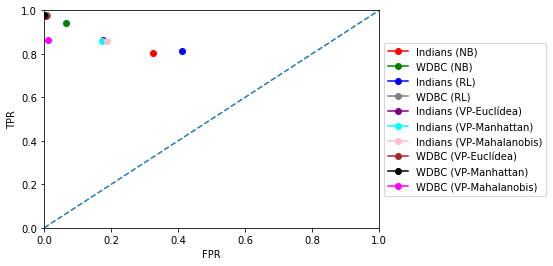

In [70]:
#Plotteamos las gráficas

plt.plot(FPR_i_nb, TPR_i_nb, color='red', marker='o', label='Indians (NB)')
plt.plot(FPR_w_nb, TPR_w_nb, color='green', marker='o', label='WDBC (NB)')

plt.plot(FPR_i_rl, TPR_i_rl, color='blue', marker='o', label='Indians (RL)')
plt.plot(FPR_w_rl, TPR_w_rl, color='gray', marker='o', label='WDBC (RL)')

plt.plot(FPR_i_vp_e, TPR_i_vp_e, color='purple', marker='o', label='Indians (VP-Euclídea)')
plt.plot(FPR_i_vp_man, TPR_i_vp_man, color='cyan', marker='o', label='Indians (VP-Manhattan)')
plt.plot(FPR_i_vp_mah, TPR_i_vp_mah, color='pink', marker='o', label='Indians (VP-Mahalanobis)')

plt.plot(FPR_w_vp_e, TPR_w_vp_e, color='brown', marker='o', label='WDBC (VP-Euclídea)')
plt.plot(FPR_w_vp_man, TPR_w_vp_man, color='black', marker='o', label='WDBC (VP-Manhattan)')
plt.plot(FPR_w_vp_mah, TPR_w_vp_mah, color='magenta', marker='o', label='WDBC (VP-Mahalanobis)')

plt.plot( [0,1],[0,1], ls='--') #Linea diagonal

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

<p style="font-size: medium"> Podemos observar que para el dataset de indians se obtienen peores resultados que para el dataset de WDBC. Dentro de los Indians, tanto Naive Bayes y Regresión Logística tienen aproximadamente el mismo porcentaje de verdaderos positivos, pero el clasificador de Naive Bayes obtiene menos cantidad de falsos positivos que el de Regresión Logística. Por lo que podría decirse que Naive Bayes ligeramente más certero que Regresión Logística para este dataset. En cuanto a Vecinos Próximos, vemos que tiene muchísimos menos falsos positivos que los calsificadores anteriores. No cabe duda que el mismo se ajusta mucho mejor al dataset que Bayes y que Regresión.</p>

<p style="font-size: medium"> En el caso del WDBC, observamos que el clasificador de Regresión Logística no solo obtiene más verdaderos positivos, sino que consigue menos falsos positivos, consiguiendo casi una clasificación perfecta, que el de Naive Bayes. Sin embargo, si comparamos regresión con vecinos próximos, vemos que este segundo es ligeramente mejor que el primero. Tiene menos falsos positivos que regresión y aparente estar ligeramente más alejado de la diagonal.</p>

<p style="font-size: medium"> En general, los tres modelos podrían considerarse adecuados para clasificar estos datasets, puesto que se posicionan por encima y alejados de la recta. Esto es debido a que mientras más alejados de la recta, más aumenta la sensibilidad y la especificidad del modelo. En el caso de caer sobre la recta significaría una clasificación completamente aleatoria, por lo que, al caer debajo de la recta significaría una clasificación peor que el azar.</p>